In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
%cd /content/drive/MyDrive/ucs655-project-face_recognition

/content/drive/MyDrive/ucs655-project-face_recognition


In [ ]:
!pip install mtcnn 

     |████████████████████████████████| 2.3MB 7.9MB/s 


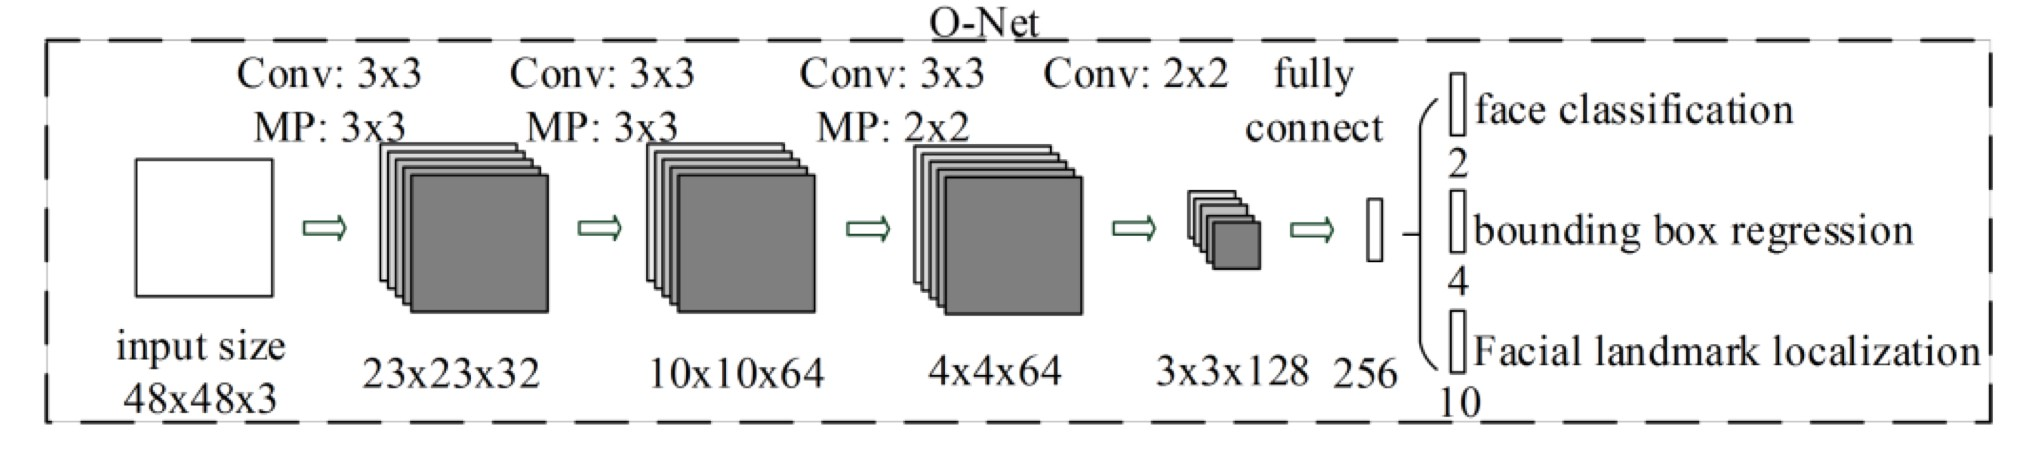

In [ ]:
# Extracting faces from images
from mtcnn.mtcnn import MTCNN
detector = MTCNN() 
def extractFaces(X, Y):
  updatedX=[]
  updatedY=[]
  i = 0

  for img in X:
    faces = detector.detect_faces(img)
    
    if len(faces) > 0:
      x, y, w, h = faces[0]['box']
      updatedX.append(img[y:y+h, x:x+w])
      updatedY.append(Y[i])
    
    if i % 100 == 0:
      print(i)
    
    i += 1

  return updatedX, updatedY

def extractFacesSingle(img):
  faces = detector.detect_faces(img)
  if len(faces) > 0:
    x, y, w, h = faces[0]['box']
    return img[y:y+h, x:x+w]
  return img

In [ ]:
# Load images into memory
image_dimension = (224, 224)
import cv2

def load_data(numberOfImages=100):
  uneditedPath = 'unedited'  
  label_dict = {}
  X = []
  Y = []
  i = 0
  img_count = 0

  for person in sorted(os.listdir(uneditedPath)):
    label_dict[i] = person
    img_count = 0

    for image in sorted(os.listdir(os.path.join(uneditedPath,person))):
      print(image)
      img_count += 1
      img_path=os.path.join(uneditedPath,person,image)
      
      img_large=cv2.imread(img_path)
      img_large_coloured = cv2.cvtColor(img_large, cv2.COLOR_BGR2RGB)

      X.append(img_large_coloured)
      Y.append(i)
  
      print(img_count + i * numberOfImages)

      if img_count == numberOfImages:
        print(person)
        break

    i += 1

  return (X, Y, label_dict)



In [ ]:
# Load images
X,Y,label_dict=load_data()

Hugo_Chavez_0060.jpg
1
Hugo_Chavez_0005.jpg
2
Hugo_Chavez_0026.jpg
3
Hugo_Chavez_0017.jpg
4
Hugo_Chavez_0003.jpg
5
Hugo_Chavez_0041.jpg
6
Hugo_Chavez_0038.jpg
7
Hugo_Chavez_0053.jpg
8
Hugo_Chavez_0016.jpg
9
Hugo_Chavez_0062.jpg
10
Hugo_Chavez_0019.jpg
11
Hugo_Chavez_0042.jpg
12
Hugo_Chavez_0023.jpg
13
Hugo_Chavez_0007.jpg
14
Hugo_Chavez_0025.jpg
15
Hugo_Chavez_0055.jpg
16
Hugo_Chavez_0067.jpg
17
Hugo_Chavez_0012.jpg
18
Hugo_Chavez_0048.jpg
19
Hugo_Chavez_0058.jpg
20
Hugo_Chavez_0032.jpg
21
Hugo_Chavez_0015.jpg
22
Hugo_Chavez_0021.jpg
23
Hugo_Chavez_0013.jpg
24
Hugo_Chavez_0022.jpg
25
Hugo_Chavez_0045.jpg
26
Hugo_Chavez_0044.jpg
27
Hugo_Chavez_0018.jpg
28
Hugo_Chavez_0006.jpg
29
Hugo_Chavez_0057.jpg
30
Hugo_Chavez_0004.jpg
31
Hugo_Chavez_0029.jpg
32
Hugo_Chavez_0040.jpg
33
Hugo_Chavez_0014.jpg
34
Hugo_Chavez_0002.jpg
35
Hugo_Chavez_0009.jpg
36
Hugo_Chavez_0011.jpg
37
Hugo_Chavez_0020.jpg
38
Hugo_Chavez_0008.jpg
39
Hugo_Chavez_0001.jpg
40
Hugo_Chavez_0010.jpg
41
Hugo_Chavez_0052.jpg
42
H

In [ ]:
# Extract faces from images
X_extracted, Y_extracted = extractFaces(X, Y)

84


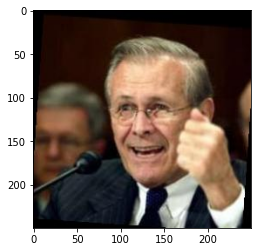

99


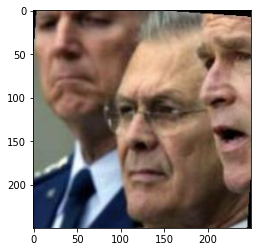

712


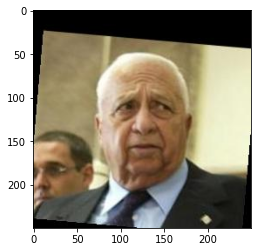

In [ ]:
# Resize images ro 224, 224
import matplotlib.pyplot as plt

X_resized = []
Y_resized = []

for i in range(len(X_extracted)):
  try:
    resized_image = cv2.resize(X_extracted[i], image_dimension, interpolation = cv2.INTER_NEAREST) 
    X_resized.append(resized_image)
    Y_resized.append(Y_extracted[i])

  except:
    print(i)
    plt.imshow(X[i])
    plt.show()
    pass

In [ ]:
# Total number of resized images
print(len(X_resized))
print(len(Y_resized))

812
812


In [ ]:
# Split image data into testing training and validation
from sklearn.model_selection import train_test_split
x_train_val, x_test, y_train_val, y_test = train_test_split(X_resized, Y_resized, test_size=0.33, random_state=234, stratify=Y_resized)

[3, 6, 0, 1, 0, 4, 7, 6, 4, 8, 5, 6, 7, 3, 0, 4, 7, 2, 5, 6, 9, 4, 8, 5, 7, 1, 5, 3, 7, 8, 8, 7, 3, 2, 4, 8, 0, 7, 2, 7, 5, 6, 5, 5, 6, 2, 7, 5, 9, 0, 7, 9, 1, 4, 0, 4, 8, 1, 7, 1, 3, 0, 1, 5, 0, 1, 6, 1, 7, 5, 4, 9, 9, 5, 4, 8, 6, 8, 6, 9, 3, 8, 5, 3, 3, 3, 7, 8, 8, 5, 4, 1, 6, 4, 9, 5, 9, 2, 1, 5, 5, 6, 2, 4, 1, 3, 5, 2, 1, 5, 3, 5, 9, 0, 6, 6, 7, 6, 1, 6, 0, 1, 7, 7, 7, 4, 4, 1, 4, 0, 7, 5, 1, 6, 6, 6, 5, 8, 6, 5, 1, 4, 7, 5, 1, 9, 5, 0, 8, 0, 7, 6, 6, 2, 4, 1, 0, 6, 2, 8, 4, 0, 8, 9, 0, 7, 2, 4, 6, 2, 7, 8, 8, 1, 5, 0, 0, 8, 8, 3, 4, 6, 9, 6, 5, 7, 2, 2, 4, 2, 4, 4, 2, 0, 6, 1, 4, 6, 0, 8, 5, 4, 4, 1, 7, 2, 9, 5, 4, 7, 6, 4, 9, 7, 5, 6, 5, 6, 0, 9, 4, 7, 5, 5, 0, 7, 6, 4, 1, 8, 2, 7, 7, 6, 8, 0, 6, 9, 7, 9, 9, 5, 6, 2, 2, 5, 1, 1, 9, 4, 1, 7, 5, 6, 6, 6, 1, 6, 3, 5, 7, 8, 6, 7, 2, 6, 4, 7, 1, 5, 1, 7, 7, 9, 8, 2, 5, 2, 8, 8, 6, 5, 9, 5, 1, 0, 1, 4, 7, 4, 3, 8, 7, 1, 4, 5, 1, 3, 4, 7, 0, 6, 9, 1, 1, 6, 4, 0, 5, 1, 6, 1, 2, 7, 4, 4, 4, 6, 8, 4, 6, 8, 5, 5, 8, 1, 8, 5, 3, 1, 0, 1, 9, 

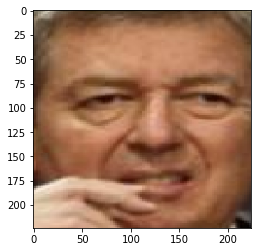

(544, 224, 224, 3)
(224, 224, 3)
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([24, 32, 20, 17, 33, 33, 33, 33, 25, 18]))


In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

print(y_train_val)
y_train_val = np.array(y_train_val)
y_test = np.array(y_test)  

x_train_val = np.array(x_train_val)
x_test = np.array(x_test)

plt.imshow(x_train_val[0])
plt.show()
print(x_train_val.shape)
print(x_train_val[2].shape)
print(np.unique(y_test, return_counts=True))

x_train_val = x_train_val.astype('float32')
x_test = x_test.astype('float32')

# Changing label encoding to categorical 
y_test=to_categorical(y_test)
y_train_val=to_categorical(y_train_val) 

In [ ]:
# Splitting testing and validation
x_val = x_train_val[:100, :, :, :]
y_val = y_train_val[:100, :]

x_train = x_train_val[100:, :, :, :]
y_train = y_train_val[100:, :]

In [ ]:
from keras.layers import Input, Dense, GlobalAveragePooling2D, Dropout
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input

# Imagenet dataset
- Classes: 17,000
- Total images: ~12 Million
- Per class images: 732 - 1300 

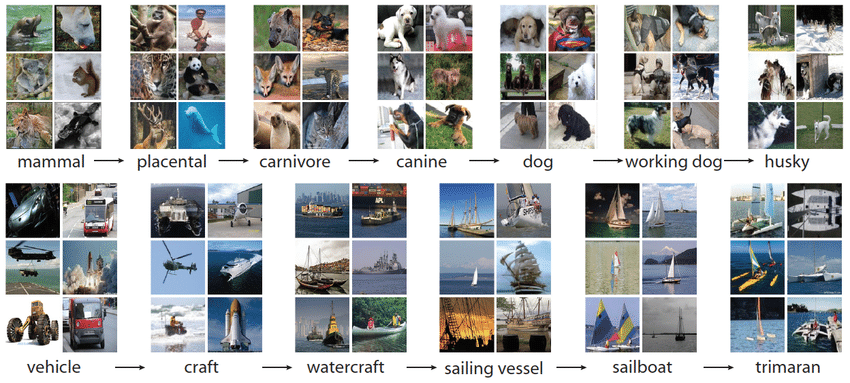

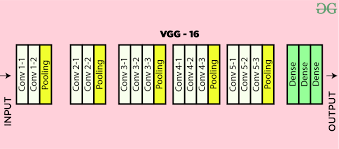

In [ ]:
# Load vgg model with imagenet weights, without output layer
vgg = VGG16(input_shape = (224, 224, 3), weights='imagenet', include_top=False)


In [ ]:
# Set existing layers to not be trained
for layer in vgg.layers:
  layer.trainable = False


In [ ]:
total_classes=10

# Adding layers on top of vgg model

x = vgg.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dense(total_classes, activation='softmax')(x)

In [ ]:
# Creating a model with inputs starting at vgg model and our output
model = Model(inputs=vgg.input, outputs=x)


Model: "model_71"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_69 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0  

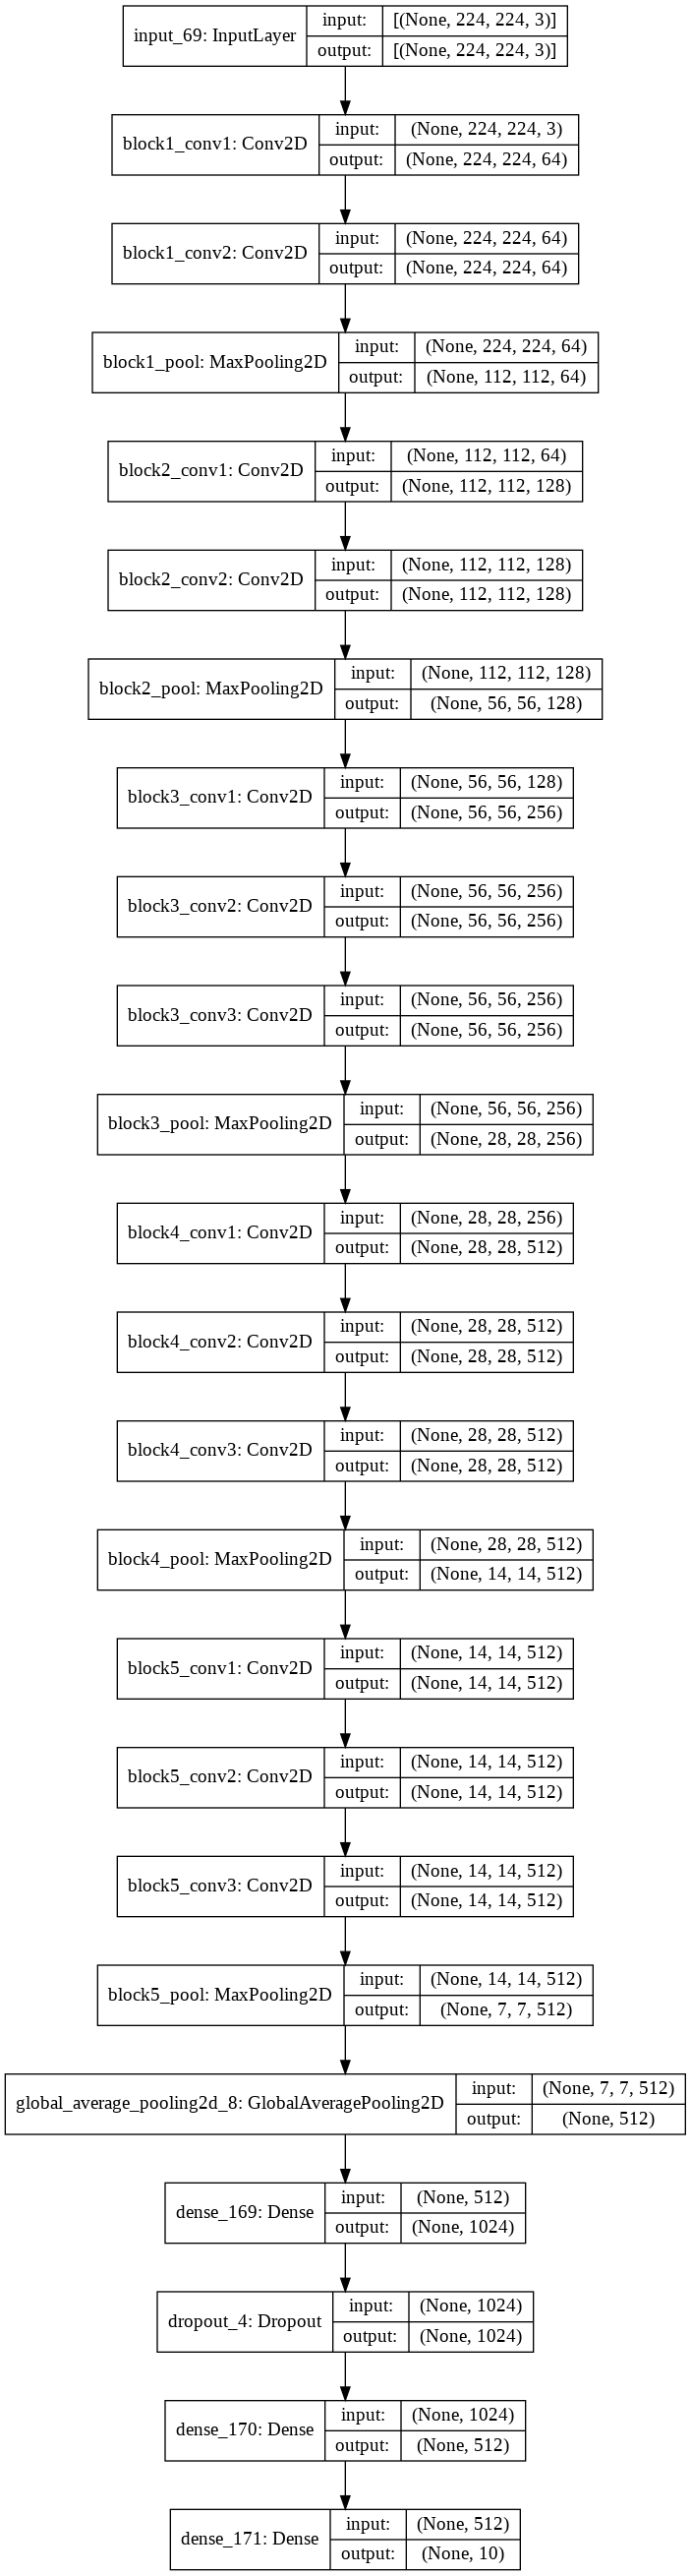

In [ ]:
# Model structure
model.summary()
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [ ]:
# Compile the model and set optimizer, loss function and metrics
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Create callbacks for model
filepath = "best_model.hdf5"
from tensorflow.keras.callbacks import  ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True)

early_stopping = EarlyStopping(
    monitor="val_loss",
    min_delta=0.01,
    patience=5
)

callbacks_list = [checkpoint, early_stopping]


In [ ]:
# Preprocess input for vgg model
preprocessed_x_train = preprocess_input(x_train)
preprocessed_x_val = preprocess_input(x_val)

# Fit model
H = model.fit(
        preprocessed_x_train,
        y_train,
        batch_size=128,
        epochs=30,
        validation_data=(preprocessed_x_val, y_val),
        callbacks=callbacks_list
)


Epoch 1/30
4/4 [==============================] - 281s 72s/step - loss: 5.0979 - accuracy: 0.1121 - val_loss: 5.6165 - val_accuracy: 0.1100

Epoch 00001: val_loss improved from inf to 5.61654, saving model to best_model.hdf5
Epoch 2/30
4/4 [==============================] - 275s 70s/step - loss: 4.1257 - accuracy: 0.2570 - val_loss: 2.9721 - val_accuracy: 0.3400

Epoch 00002: val_loss improved from 5.61654 to 2.97213, saving model to best_model.hdf5
Epoch 3/30
4/4 [==============================] - 280s 72s/step - loss: 2.3164 - accuracy: 0.4139 - val_loss: 1.8260 - val_accuracy: 0.3300

Epoch 00003: val_loss improved from 2.97213 to 1.82603, saving model to best_model.hdf5
Epoch 4/30
4/4 [==============================] - 272s 69s/step - loss: 1.5256 - accuracy: 0.4576 - val_loss: 1.5592 - val_accuracy: 0.4400

Epoch 00004: val_loss improved from 1.82603 to 1.55923, saving model to best_model.hdf5
Epoch 5/30
4/4 [==============================] - 278s 71s/step - loss: 1.2678 - accurac

In [ ]:
# Evaluating model
preprocessed_x_test = preprocess_input(x_test)

model.evaluate(preprocessed_x_test, y_test, batch_size=5)

54/54 [==============================] - 135s 2s/step - loss: 0.5376 - accuracy: 0.8396


[0.5376203060150146, 0.8395522236824036]

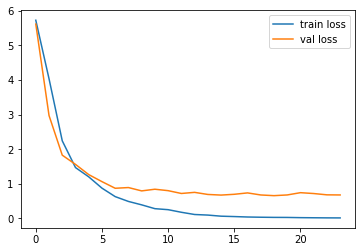

In [ ]:
# Saving loss graph
plt.plot(H.history['loss'], label='train loss')
plt.plot(H.history['val_loss'], label='val loss')
plt.legend()
plt.show()
#plt.savefig('loss-b_128-e_30')


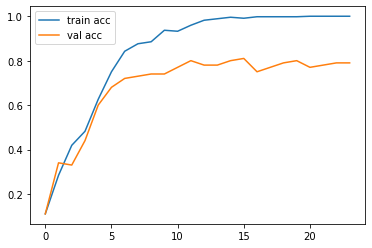

In [ ]:
# Saving accuracy graph
plt.plot(H.history['accuracy'], label='train acc')
plt.plot(H.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
#plt.savefig('accuracy-b_128-e_30')


In [ ]:
# Saving model
model_json = model.to_json()
with open("bestmodel.json", "w") as json_file:
    json_file.write(model_json)

model.save_weights("bestmodel.h5")

In [ ]:
# Saving preprocessed_x_test, y_test data and label_dict
import pickle

with open('preprocessed_x_test.pickle', 'wb') as handle:
    pickle.dump(preprocessed_x_test, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('y_test.pickle', 'wb') as handle:
    pickle.dump(y_test, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('label_dict.pickle', 'wb') as handle:
    pickle.dump(label_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [ ]:
# Loading saved model
from keras.models import load_model, model_from_json

json_file = open('bestmodel.json', 'r')
loaded_model_json = json_file.read()
json_file.close()

# Weights are loaded of model with least loss, or of model at last epoch
# for last epoch when training stopped: bestmodel.h5; least loss: best_model-a_79-vl_65-e__19-b_128-e_30.hdf5
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("bestmodel.h5")

loaded_model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# For testing if model saved properly; testing against saved testing data
import pickle

with open('preprocessed_x_test.pickle', 'rb') as handle:
    saved_test_x = pickle.load(handle)

with open('y_test.pickle', 'rb') as handle:
    saved_test_y = pickle.load(handle)

loaded_model.evaluate(saved_test_x, saved_test_y, batch_size=5)


54/54 [==============================] - 150s 2s/step - loss: 0.4585 - accuracy: 0.8520


[0.5376203060150146, 0.8395522236824036]

In [ ]:
# Evaluating n * 10 images, n from each class using loaded model
n = 1
import numpy as np
from tensorflow.keras.utils import to_categorical
from keras.applications.vgg16 import preprocess_input

test_X, test_Y, new_labels = load_data(n)
test_X_extracted, test_Y_extracted = extractFaces(test_X, test_Y)

test_X_resized = []
test_Y_resized = []

for i in range(len(test_X_extracted)):
  try:
    resized_image = cv2.resize(test_X_extracted[i], image_dimension, interpolation = cv2.INTER_NEAREST) 
    test_X_resized.append(resized_image)
    test_Y_resized.append(test_Y_extracted[i])
  except:
    pass

test_X_resized = np.array(test_X_resized)
test_X_resized = test_X_resized.astype('float32')
test_Y_resized = np.array(test_Y_resized)

test_X_resized = preprocess_input(test_X_resized)

# Make new labels align with old ones
with open('label_dict.pickle', 'rb') as handle:
    label_dict = pickle.load(handle)

for i in range(len(test_Y_resized)):
  new = new_labels[test_Y_resized[i]]
  old = label_dict[test_Y_resized[i]]

  if new != old:
    for int_label, person in label_dict.items():
      if person == new:
        test_Y_resized[i] = int_label
  
    
test_Y_resized = to_categorical(test_Y_resized)

loaded_model.evaluate(test_X_resized, test_Y_resized, batch_size=5)


Ariel_Sharon_0001.jpg
1
Ariel_Sharon
Colin_Powell_0001.jpg
2
Colin_Powell
Donald_Rumsfeld_0001.jpg
3
Donald_Rumsfeld
George_W_Bush_0001.jpg
4
George_W_Bush
Gerhard_Schroeder_0001.jpg
5
Gerhard_Schroeder
Hugo_Chavez_0001.jpg
6
Hugo_Chavez
Jean_Chretien_0001.jpg
7
Jean_Chretien
John_Ashcroft_0001.jpg
8
John_Ashcroft
Junichiro_Koizumi_0001.jpg
9
Junichiro_Koizumi
Tony_Blair_0001.jpg
10
Tony_Blair
0
2/2 [==============================] - 5s 3s/step - loss: 0.8848 - accuracy: 0.7000


[0.884793758392334, 0.699999988079071]

In [ ]:
# Testing loaded model with single image

test_image_path = 'unedited/Jean_Chretien/Jean_Chretien_0050.jpg'

img = cv2.imread(test_image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = extractFacesSingle(img)
img = cv2.resize(img, image_dimension, interpolation = cv2.INTER_NEAREST) 

img = np.array(img)
img = img.astype('float32')

img = np.reshape(img, newshape=(1, 224, 224, 3))
preprocess_input(img)

prediction = loaded_model(img, training=False)

# Load label dictionary
with open('label_dict.pickle', 'rb') as handle:
    label_dict = pickle.load(handle)

print("person in image is: " + label_dict[np.argmax(prediction)].replace('_', ' '))


person in image is: Jean Chretien
